In [1]:
# c = C_0  * r ^ t
# standardize: mean 0, variance 1
# normalize: min 0 max 1
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!wget -nv https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

2024-06-12 15:04:34 URL:https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv [2302/2302] -> "moore.csv.6" [1]


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


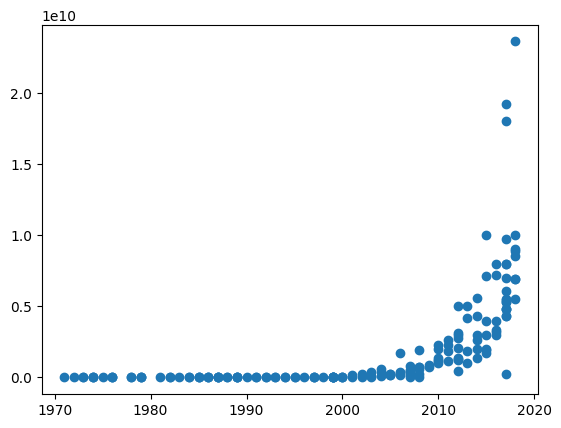

In [2]:
data = pd.read_csv('moore.csv', header=None).values
# -1 means that the dimension is uknown and the reshapre function calculates it automatically.
# here the dimension is NxD where D=1
X = data[:,0].reshape(-1,1)
Y = data[:,1].reshape(-1,1)
print(type(data[:,0]))
print(type(X))

plt.scatter(X,Y)

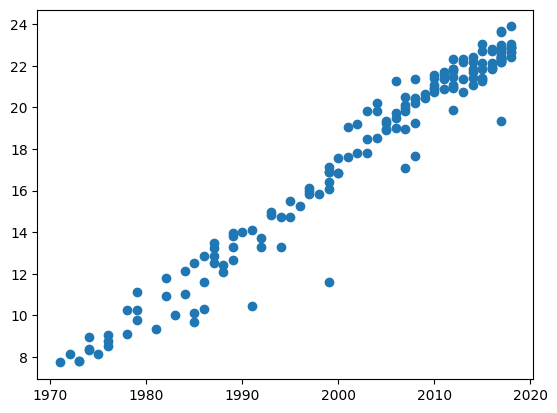

In [3]:
Y = np.log(Y)
plt.scatter(X,Y)

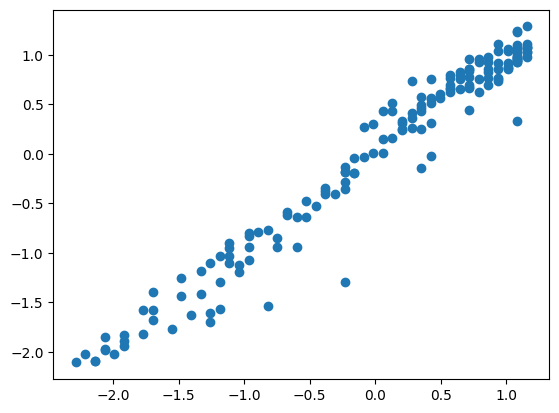

In [4]:
# standardize the values
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X-mx)/sx
Y = (Y-my)/sy
plt.scatter(X,Y)

In [5]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [6]:
model = nn.Linear(1,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [7]:
type(inputs)

torch.Tensor

In [8]:
n_epochs = 100
losses = []
for it in range(n_epochs):
  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  losses.append(loss.item())
  loss.backward() # backward and optimize
  optimizer.step()
  print(f'Epoch {it+1}/{n_epochs}, Loss {loss.item():.4f}')

Epoch 1/100, Loss 3.0263
Epoch 2/100, Loss 2.9080
Epoch 3/100, Loss 2.7146
Epoch 4/100, Loss 2.4799
Epoch 5/100, Loss 2.2286
Epoch 6/100, Loss 1.9774
Epoch 7/100, Loss 1.7374
Epoch 8/100, Loss 1.5148
Epoch 9/100, Loss 1.3128
Epoch 10/100, Loss 1.1325
Epoch 11/100, Loss 0.9735
Epoch 12/100, Loss 0.8348
Epoch 13/100, Loss 0.7147
Epoch 14/100, Loss 0.6112
Epoch 15/100, Loss 0.5227
Epoch 16/100, Loss 0.4471
Epoch 17/100, Loss 0.3828
Epoch 18/100, Loss 0.3283
Epoch 19/100, Loss 0.2822
Epoch 20/100, Loss 0.2433
Epoch 21/100, Loss 0.2105
Epoch 22/100, Loss 0.1828
Epoch 23/100, Loss 0.1596
Epoch 24/100, Loss 0.1400
Epoch 25/100, Loss 0.1236
Epoch 26/100, Loss 0.1098
Epoch 27/100, Loss 0.0983
Epoch 28/100, Loss 0.0886
Epoch 29/100, Loss 0.0804
Epoch 30/100, Loss 0.0736
Epoch 31/100, Loss 0.0679
Epoch 32/100, Loss 0.0631
Epoch 33/100, Loss 0.0591
Epoch 34/100, Loss 0.0557
Epoch 35/100, Loss 0.0529
Epoch 36/100, Loss 0.0506
Epoch 37/100, Loss 0.0486
Epoch 38/100, Loss 0.0470
Epoch 39/100, Loss 0.

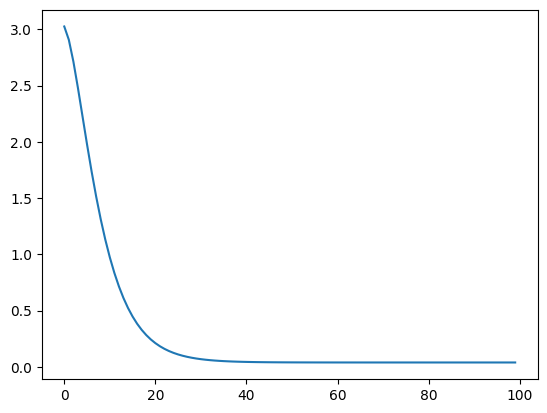

In [9]:
plt.plot(losses)

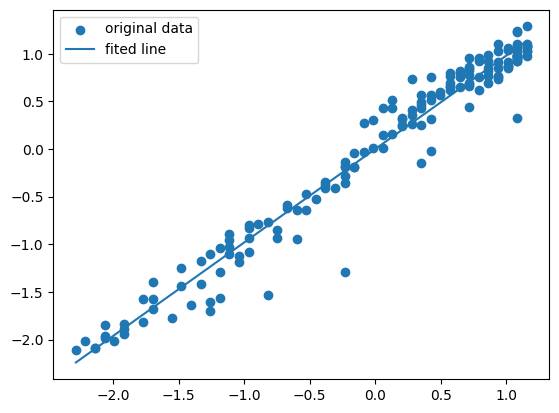

In [11]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label="original data")
plt.plot(X, predicted, label= "fited line")
plt.legend()
plt.show()

In [12]:
w= model.weight.data.numpy()
print(w)

[[0.9802357]]


In [15]:
a = w[0,0] * sy / sx
print("time to double:", np.log(2)/a) # slope

time to double: 2.029323698066273
